### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pzblend import PhotozBlend, testing

### Load a saved class object to work with

In [2]:
# - create an empty instance of the PhotozBlend class
pzb = PhotozBlend()

# - load pickled parameters and data
pzb = pzb.load(fpath='output/pzb.classobj', compression='gzip')

INFO:root:<module>:load: The class object has been reloaded from '/Users/erfan/Downloads/python_codes/output/pzb.classobj.gzip'


Let's take a look at the parameters and values we had last time:

In [3]:
pzb.params

,value
truth_df,[[ 0.00000000e+00\n 2.07442150e+01\n 2.19088497e+01\...
coadd_df,[[0.0 1.0 16844531022438126\n 0.06599672477650459\n 0....
zgrid,[0.005 0.015 0.025 0.035\n 0.045 0.055 0.065 ... 2.945\n...
bandwidth,0.0494788
bandwidth_tuple,None
bandwidth_array,None
bandwidth_str,scott
search_params,None
true_z_hist_smooth,[0.07674089 0.100471\n 0.1282783 0.15974834\n 0.1940677...
refresh_z,False


### Filter the dataframes

You can get all of the columns in the `truth` data for 3-1 matches simply by:

In [3]:
pzb.filter('truth', 3, 1).get()

,convergence,mag_y_lsst,mag_g_lsst,shear_2,size_true,ellipticity_2_true,mag_r_lsst,mag_i_lsst,shear_1,ra,dec,galaxy_id,redshift,ellipticity_1_true,mag_z_lsst,mag_u_lsst,group_id
0,-0.000050,21.454112,22.283743,0.000045,0.564921,0.070144,21.845641,21.610924,0.000030,60.940679,-35.703955,6937500154,0.040322,0.071443,21.510674,23.470044,39
1,0.001939,24.117048,25.647409,0.012896,0.258889,0.036413,25.367488,25.097419,-0.007667,60.940796,-35.703830,6941192786,1.254953,-0.001309,24.444135,25.728519,39
2,-0.000513,20.311211,21.191574,-0.000182,0.513218,-0.497470,20.706234,20.495879,0.000222,60.940666,-35.703751,6937508891,0.102183,-0.335978,20.371796,22.539559,39
3,0.000011,22.951069,23.518850,0.000009,0.905487,-0.203981,23.225431,23.056116,-0.000009,60.620506,-35.926324,6937500484,0.041613,0.017278,22.989486,24.588947,112
4,0.018137,25.888285,26.331360,0.009718,0.127603,0.010998,26.067988,26.206400,-0.009469,60.620384,-35.926553,6953611087,2.444774,0.050828,26.076697,27.158390,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,-0.005264,24.390258,24.201661,-0.012866,0.151270,0.023252,24.201741,24.316175,0.005955,60.147096,-35.888834,6952411149,2.271986,0.069159,24.393758,24.390615,449406
3722,-0.005334,25.747877,26.258455,-0.012863,0.149465,-0.010557,26.101350,26.103275,0.005932,60.147051,-35.888798,6952411140,2.267313,-0.002817,25.964218,27.094938,449406
3723,0.065574,24.514140,24.675567,0.007932,0.244910,0.005211,24.551856,24.535422,0.050592,60.728683,-36.038819,6954114100,2.518731,-0.038619,24.603320,25.075372,457412
3724,0.031663,24.349847,25.979320,-0.012151,0.231352,0.000966,25.527362,25.046833,0.036231,60.729013,-36.039002,6940293051,1.059748,-0.304833,24.424211,25.859590,457412


Or get the `coadd` data for 4-1 matches as an unpackable numpy array not a dataframe:

In [4]:
pzb.filter('coadd', 4, 1).get(return_df=False)

array([[2.937102783207024e-10, 0.0, 0.0, ..., 0.0, 0.024792952064661367,
        0.0],
       [1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0],
       [16844681346309913, 16844818785243664, 16844543907334520, ...,
        16844810195310251, 16844947634286826, 16845093663170860],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [8, 739, 766, ..., 366817, 394541, 459645]], dtype=object)

Or get 4 columns of the `coadd` data for 1-1 matches as a dataframe:

In [5]:
pzb.filter('coadd', 1, 1).get(['objectId', 'group_id','blendedness', 'mag_i', 'mag_i_lsst', 'mag_err_i_lsst'], return_df=True)

,objectId,group_id,blendedness,mag_i,mag_i_lsst,mag_err_i_lsst
0,16844539612391999,1,0.000135,20.891334,19.044742,0.002519
1,16844947634260646,9,0.000000,22.702610,21.104775,0.014039
2,16845085073236912,10,0.000004,22.610839,22.282026,0.015497
3,16844672756373802,11,0.090189,23.670079,22.091747,0.029053
4,16845085073214685,12,0.000000,22.412237,20.884414,0.009691
...,...,...,...,...,...,...
28477,16845093663171543,469128,0.007695,24.093551,23.630200,0.059659
28478,16844947634267728,469842,0.000000,25.624371,21.665224,0.073767
28479,16844947634281525,471422,0.244041,25.462371,21.777033,0.080244
28480,16844672756373394,472223,0.000027,24.569685,23.972596,0.094205


Repeat with `pandas_eval=True`:

In [6]:
pzb.filter('coadd', 1, 1).get(['objectId', 'group_id','blendedness', 'mag_i', 'mag_i_lsst', 'mag_err_i_lsst'], pandas_eval=True, return_df=True)

,objectId,group_id,blendedness,mag_i,mag_i_lsst,mag_err_i_lsst
0,1.68445e+16,1,0.00013547,20.8913,19.0447,0.00251919
1,1.68449e+16,9,0,22.7026,21.1048,0.0140393
2,1.68451e+16,10,3.9702e-06,22.6108,22.282,0.0154967
3,1.68447e+16,11,0.0901888,23.6701,22.0917,0.0290528
4,1.68451e+16,12,0,22.4122,20.8844,0.0096915
...,...,...,...,...,...,...
28477,1.68451e+16,469128,0.00769501,24.0936,23.6302,0.0596587
28478,1.68449e+16,469842,0,25.6244,21.6652,0.0737665
28479,1.68449e+16,471422,0.244041,25.4624,21.777,0.0802435
28480,1.68447e+16,472223,2.70362e-05,24.5697,23.9726,0.0942051


Note that you could also pass `pandas_eval=True` so that pandas can carry out the evaluation internally using its built-in `eval` method. However, `pandas_eval=False` is set by default since pzblend is equipped with a faster method which gives the values with the right data types. For some reason, I can't get a better speed out of pandas built-in `eval` (compared to the internal method for the same inferred `dtype`), at least with the dafault engine. It also infers `dtype` itself but doesn't get it right.

## A test example

As an example, let's filter the data for 2-1 matches and get the redshift and  $r-i$  color only for the bright ones.
There are many ways to do this and all the following methods will lead to the exact same results.
They all have their own pros and cons in terms of memory and speed depending on the desired result.

####  <i>Some notes</i>:
- The `sort` capability can be more advanced than what is shown below, i.e. you can even pass a pandas `sort_values` dictionary: {'by': 'size_true', ...}
- You may use optional `dask_scheduler`, `dask_workers`, and `dask_npartitions` keyword arguments for `apply`, if necessary
- To return the result as a dataframe, simply pass `return_df=True` otherwise you will get a numpy array by default which can be directly unpacked to one or more variables
- By setting `inplace=True` the command generates the desired values (and columns) within the `apply` process (it is not efficient in this particular example but it might be the only way to do some other evaluations)
- `verbose` is `True` by default

In [7]:
%time df0 = pzb.filter(cat='truth', num_truth=2, num_coadd=1, apply={'sort': 'mag_i_lsst', 'nth': 0}).get(['redshift','mag_r_lsst - mag_i_lsst'], return_df=True)
%time df1 = pzb.filter('truth', 2, 1, apply={'sort': 'mag_i_lsst', 'nth': 0}, get=['redshift','mag_r_lsst - mag_i_lsst'], return_df=True) # with `apply` inplace defaults to True
%time df2 = pzb.filter('truth', 2, 1, apply={'sort': 'mag_i_lsst', 'nth': 0}, get=['redshift','mag_r_lsst - mag_i_lsst'], return_df=True, inplace=False)
%time df3 = pzb.filter('truth', 2, 1, apply={'where': {'mag_i_lsst': 'min'}}, get=['redshift','mag_r_lsst - mag_i_lsst'], return_df=True)
%time df4 = pzb.filter('truth', 2, 1, apply={'where': {'mag_i_lsst': 'min'}}, get=['redshift','mag_r_lsst - mag_i_lsst'], return_df=True, inplace=False)
%time df5 = pzb.filter('truth', 2, 1, where={'mag_i_lsst': 'min'}, get=['redshift','mag_r_lsst - mag_i_lsst'], return_df=True) # `inplace` is not applicable here
%time df6 = pzb.filter('truth', 2, 1, where={'mag_i_lsst': 'min'}, cols='redshift', get='mag_r_lsst - mag_i_lsst', return_df=True)
%time df7 = pzb.filter('truth', 2, 1, where={'mag_i_lsst': 'min'}).get('redshift', 'mag_r_lsst - mag_i_lsst', return_df=True)
%time df8 = pzb.filter('truth', 2, 1, where={'mag_i_lsst': 'min'}, cols=['redshift', 'mag_r_lsst', 'mag_i_lsst']).get('redshift', 'mag_r_lsst - mag_i_lsst', return_df=True)

INFO:root:get:translate_easy_string: Evaluating ['redshift', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:<module>:get: Columns accessible for the 2 evaluations: ['convergence', 'mag_y_lsst', 'mag_g_lsst', 'shear_2', 'size_true', 'ellipticity_2_true', 'mag_r_lsst', 'mag_i_lsst', 'shear_1', 'ra', 'dec', 'galaxy_id', 'redshift', 'ellipticity_1_true', 'mag_z_lsst', 'mag_u_lsst', 'group_id']
INFO:root:<module>:filter: Columns grabbed for the 1st evaluation: ['redshift']


✓ Done!
CPU times: user 16.8 s, sys: 3.49 s, total: 20.3 s
Wall time: 18 s


INFO:root:<module>:filter: Columns grabbed for the 2nd evaluation: ['mag_r_lsst', 'mag_i_lsst']


INFO:root:get:translate_easy_string: Evaluating ['redshift', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:filter:get: Columns accessible for the 2 evaluations: ['redshift', 'mag_r_lsst', 'mag_i_lsst']
INFO:root:<module>:filter: Columns grabbed for the 1st evaluation: ['redshift']


✓ Done!
CPU times: user 12 s, sys: 2.13 s, total: 14.2 s
Wall time: 12.8 s


INFO:root:<module>:filter: Columns grabbed for the 2nd evaluation: ['mag_r_lsst', 'mag_i_lsst']


INFO:root:get:translate_easy_string: Evaluating ['redshift', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:filter:get: Columns accessible for the 2 evaluations: ['redshift', 'mag_r_lsst', 'mag_i_lsst']
INFO:root:<module>:filter: Columns grabbed for the 1st evaluation: ['redshift']
INFO:root:<module>:filter: Columns grabbed for the 2nd evaluation: ['mag_r_lsst', 'mag_i_lsst']


✓ Done!
CPU times: user 12 s, sys: 2.14 s, total: 14.1 s
Wall time: 12.8 s


INFO:root:get:translate_easy_string: Evaluating ['redshift', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:filter:get: Columns accessible for the 2 evaluations: ['redshift', 'mag_r_lsst', 'mag_i_lsst']
INFO:root:<module>:filter: Columns grabbed for the 1st evaluation: ['redshift']


✓ Done!
CPU times: user 17.6 s, sys: 2.53 s, total: 20.1 s
Wall time: 18.4 s


INFO:root:<module>:filter: Columns grabbed for the 2nd evaluation: ['mag_r_lsst', 'mag_i_lsst']


INFO:root:get:translate_easy_string: Evaluating ['redshift', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:filter:get: Columns accessible for the 2 evaluations: ['redshift', 'mag_r_lsst', 'mag_i_lsst']


✓ Done!
CPU times: user 17.7 s, sys: 2.56 s, total: 20.3 s
Wall time: 18.6 s


INFO:root:get:translate_easy_string: Evaluating ['redshift', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:filter:get: Columns accessible for the 2 evaluations: ['convergence', 'mag_y_lsst', 'mag_g_lsst', 'shear_2', 'size_true', 'ellipticity_2_true', 'mag_r_lsst', 'mag_i_lsst', 'shear_1', 'ra', 'dec', 'galaxy_id', 'redshift', 'ellipticity_1_true', 'mag_z_lsst', 'mag_u_lsst', 'group_id']


✓ Done!
CPU times: user 942 ms, sys: 32.2 ms, total: 974 ms
Wall time: 949 ms


INFO:root:get:translate_easy_string: Evaluating ['redshift', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:filter:get: Columns accessible for the 2 evaluations: ['convergence', 'mag_y_lsst', 'mag_g_lsst', 'shear_2', 'size_true', 'ellipticity_2_true', 'mag_r_lsst', 'mag_i_lsst', 'shear_1', 'ra', 'dec', 'galaxy_id', 'redshift', 'ellipticity_1_true', 'mag_z_lsst', 'mag_u_lsst', 'group_id']


✓ Done!
CPU times: user 972 ms, sys: 56.9 ms, total: 1.03 s
Wall time: 991 ms


INFO:root:get:translate_easy_string: Evaluating ['redshift', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:<module>:get: Columns accessible for the 2 evaluations: ['convergence', 'mag_y_lsst', 'mag_g_lsst', 'shear_2', 'size_true', 'ellipticity_2_true', 'mag_r_lsst', 'mag_i_lsst', 'shear_1', 'ra', 'dec', 'galaxy_id', 'redshift', 'ellipticity_1_true', 'mag_z_lsst', 'mag_u_lsst', 'group_id']


✓ Done!
CPU times: user 945 ms, sys: 52.7 ms, total: 998 ms
Wall time: 967 ms


INFO:root:get:translate_easy_string: Evaluating ['redshift', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:<module>:get: Columns accessible for the 2 evaluations: ['redshift', 'mag_r_lsst', 'mag_i_lsst', 'group_id']


✓ Done!
CPU times: user 958 ms, sys: 49.6 ms, total: 1.01 s
Wall time: 976 ms


As you can see, the second to last method that returned `df7` is the winner in terms of speed for this example.

In [8]:
df0

,redshift,mag_r_lsst - mag_i_lsst
0,0.036766,0.402905
1,0.032906,0.203720
2,0.044206,0.252283
3,0.037280,0.249815
4,0.033003,0.232191
...,...,...
6705,2.233724,-0.170229
6706,2.175211,-0.048138
6707,2.296889,-0.075157
6708,2.285132,-0.080027


Now we are going to use our `testing` module to check if the outputs are equal, as expected.

In [9]:
# - check if the outputs are equal
testing.all_equal(df0,df1,df2,df3,df4,df5,df6,df7,df8)

✓ The dataframes are all equal.


### Grabbing data and making plots

To start, let's assume we want to find the magnitude difference between the two `truth` galaxies in 2-1 matches. Note that this calcuation has to be in-place, hence `inplace=True`.

In [10]:
dmag = pzb.filter('truth', 2, 1, get='mag_i_lsst.max()-mag_i_lsst.min()', inplace=True)
dmag

INFO:root:filter:translate_easy_string: Evaluating ['mag_i_lsst.max()-mag_i_lsst.min()'] in the truth catalog in-place while filtering
INFO:root:<module>:filter: Columns grabbed for this single evaluation: ['mag_i_lsst']


✓ Done!


array([6.92455851, 6.92455851, 6.26609521, ..., 3.31251698, 2.28643082,
       2.28643082])

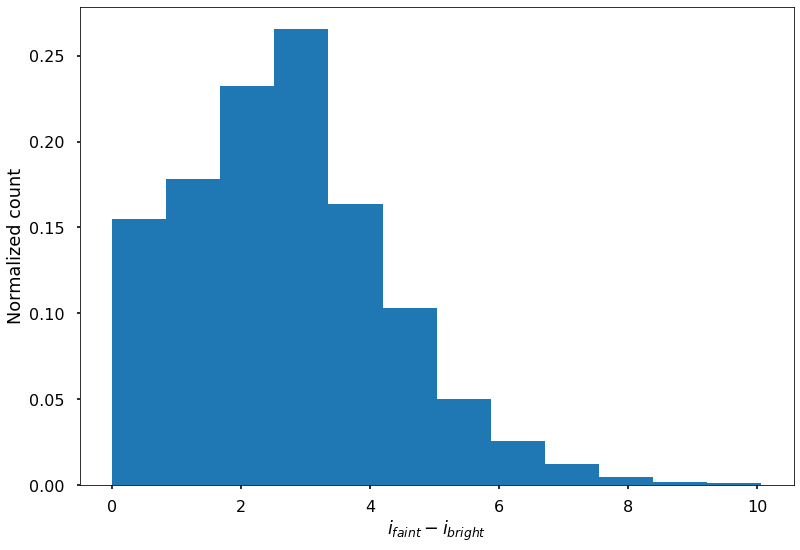

In [11]:
plt.hist(dmag, bins=12, density=True)
plt.xlabel(r'$i_{faint}-i_{bright}$')
plt.ylabel('Normalized count');

Looking at the histogram above, one can say the distribution peaks around the depth difference of the two samples ~3 as expected.

Next, let's make some color magnitude diagrams for the two samples filtering for 2-1 matches.  Here we have two galaxies (faint and bright) for the `truth` and a single galaxy for the `coadd`.

In [12]:
i_truth_bright, ri_truth_bright = pzb.filter('truth', 2, 1, where={'mag_i_lsst': 'min'}).get('mag_i_lsst','mag_r_lsst - mag_i_lsst')
i_truth_faint,  ri_truth_faint  = pzb.filter('truth', 2, 1, where={'mag_i_lsst': 'max'}).get('mag_i_lsst','mag_r_lsst - mag_i_lsst')
i_coadd, ri_coadd = pzb.filter('coadd', 2, 1).get('mag_i_lsst','mag_r_lsst - mag_i_lsst')

INFO:root:get:translate_easy_string: Evaluating ['mag_i_lsst', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:<module>:get: Columns accessible for the 2 evaluations: ['convergence', 'mag_y_lsst', 'mag_g_lsst', 'shear_2', 'size_true', 'ellipticity_2_true', 'mag_r_lsst', 'mag_i_lsst', 'shear_1', 'ra', 'dec', 'galaxy_id', 'redshift', 'ellipticity_1_true', 'mag_z_lsst', 'mag_u_lsst', 'group_id']


✓ Done!


INFO:root:get:translate_easy_string: Evaluating ['mag_i_lsst', 'mag_r_lsst - mag_i_lsst'] in the truth catalog after filtering has already been done
INFO:root:<module>:get: Columns accessible for the 2 evaluations: ['convergence', 'mag_y_lsst', 'mag_g_lsst', 'shear_2', 'size_true', 'ellipticity_2_true', 'mag_r_lsst', 'mag_i_lsst', 'shear_1', 'ra', 'dec', 'galaxy_id', 'redshift', 'ellipticity_1_true', 'mag_z_lsst', 'mag_u_lsst', 'group_id']


✓ Done!


Show the two `color` histograms in one plot:

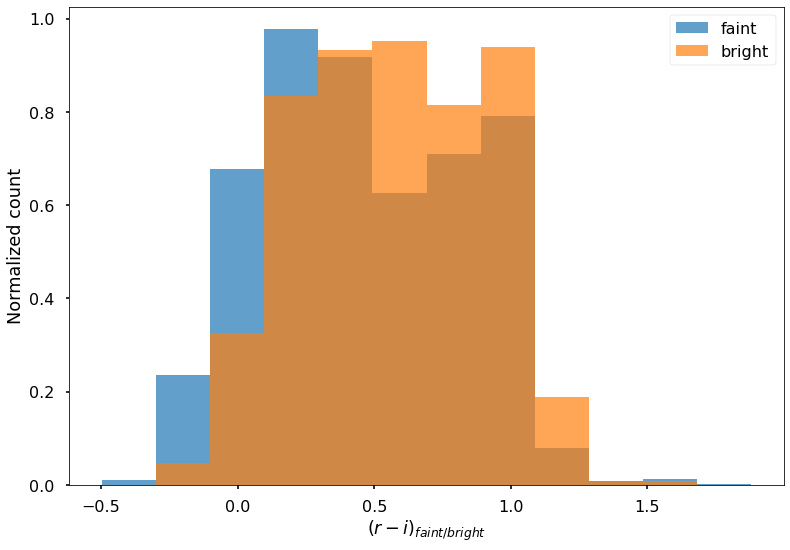

In [13]:
_, bins, _ = plt.hist(ri_truth_faint, bins=12, density=True, alpha=0.7, label='faint')
plt.hist(ri_truth_bright, bins=bins, density=True, alpha=0.7, label='bright')
plt.xlabel(r'$(r-i)_{faint/bright}$')
plt.ylabel('Normalized count')
plt.legend();

Now take the difference of the colors and draw their plots versus the magnitude of the `truth` sample.

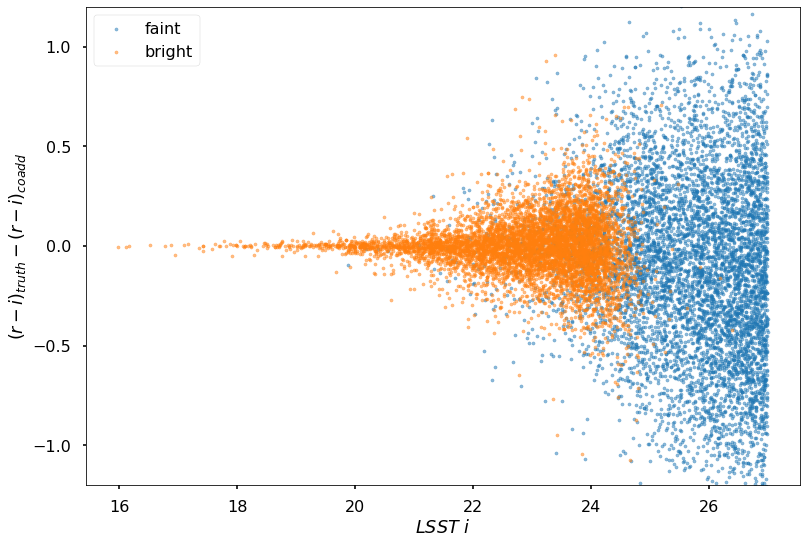

In [14]:
plt.scatter(i_truth_faint, ri_truth_faint-ri_coadd, s=10, alpha=0.5, label='faint')
plt.scatter(i_truth_bright, ri_truth_bright-ri_coadd, s=10, alpha=0.5, label='bright')
plt.xlabel(r'$LSST ~i$')
plt.ylabel(r'$(r-i)_{truth}-(r-i)_{coadd}$')
plt.ylim(-1.2,1.2)
plt.legend();